# Part 1: Segmentation of hands

In this part, you are given a sequence of video frames in which a person is playing the piano with both hands. Try to develop an algorithm to identify the pianist's hands. Portions of the hands are sometimes in deep shadow, which creates a challenging imaging situation.

In [3]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from os import listdir, makedirs
from os.path import isfile, join, abspath, exists

In [4]:
# read data
data_path = abspath('./CS585-PianoImages')
data_list = [join(data_path, file) for file in listdir(data_path) if isfile(join(data_path, file)) and 'png' in file]

In [5]:
data_list

['C:\\Users\\ljsPC\\Desktop\\CS585\\HW4\\CS585-PianoImages\\piano_14.png',
 'C:\\Users\\ljsPC\\Desktop\\CS585\\HW4\\CS585-PianoImages\\piano_15.png',
 'C:\\Users\\ljsPC\\Desktop\\CS585\\HW4\\CS585-PianoImages\\piano_16.png',
 'C:\\Users\\ljsPC\\Desktop\\CS585\\HW4\\CS585-PianoImages\\piano_17.png',
 'C:\\Users\\ljsPC\\Desktop\\CS585\\HW4\\CS585-PianoImages\\piano_18.png',
 'C:\\Users\\ljsPC\\Desktop\\CS585\\HW4\\CS585-PianoImages\\piano_19.png',
 'C:\\Users\\ljsPC\\Desktop\\CS585\\HW4\\CS585-PianoImages\\piano_22.png',
 'C:\\Users\\ljsPC\\Desktop\\CS585\\HW4\\CS585-PianoImages\\piano_23.png',
 'C:\\Users\\ljsPC\\Desktop\\CS585\\HW4\\CS585-PianoImages\\piano_24.png',
 'C:\\Users\\ljsPC\\Desktop\\CS585\\HW4\\CS585-PianoImages\\piano_25.png',
 'C:\\Users\\ljsPC\\Desktop\\CS585\\HW4\\CS585-PianoImages\\piano_26.png',
 'C:\\Users\\ljsPC\\Desktop\\CS585\\HW4\\CS585-PianoImages\\piano_27.png',
 'C:\\Users\\ljsPC\\Desktop\\CS585\\HW4\\CS585-PianoImages\\piano_33.png',
 'C:\\Users\\ljsPC\\Deskt

In [200]:
# return the img inside the bounding box
def remove_padding(binary_imgs):
    img_noPadding = []
    for img in binary_imgs:
        _, contours_opencv, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
        # choose the largest size object
        largest_index = 0
        largest_area = cv2.contourArea(contours_opencv[largest_index])
        for index in range(len(contours_opencv)):
            area = cv2.contourArea(contours_opencv[index])
            if area > largest_area:
                largest_area = area
                largest_index = index
        
        x, y, w, h = cv2.boundingRect(contours_opencv[largest_index])
        img_noPadding.append(img[y:y+h,x:x+w])
    
    return np.array(img_noPadding)


In [201]:
data_frames = []
data_frames_grayscale = []

for file in data_list:
    img = cv2.imread(file)
    data_frames.append(img.copy())
    
    img_grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    data_frames_grayscale.append(img_grayscale)
    
data_frames = np.array(data_frames)
data_frames_grayscale = np.array(data_frames_grayscale)

## compute the average value of all image frames

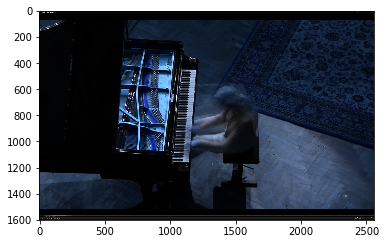

In [202]:
avg_img = np.sum(data_frames, axis=0)


avg_img = avg_img / data_frames.shape[0]
avg_img = avg_img.astype(np.uint8)

plt.imshow(avg_img)
plt.show()

## Difference the frames

In [204]:
motions = []
binary_motions = []

for frame in data_frames:
    diff = cv2.absdiff(frame, avg_img)
    diff_grayscale = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    
    boolean_filter = diff_grayscale > 15
    motion = np.zeros_like(frame)
    motion[boolean_filter] = frame[boolean_filter]
    motions.append(motion)
    
    retval, threshOutput = cv2.threshold(diff_grayscale, 15, 255, cv2.THRESH_BINARY)
    binary_motions.append(threshOutput)
    
motions = np.array(motions)
binary_motions = np.array(binary_motions)

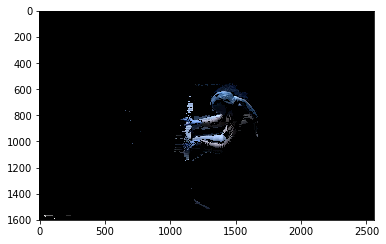

In [206]:
plt.imshow(motions[0])
plt.show()

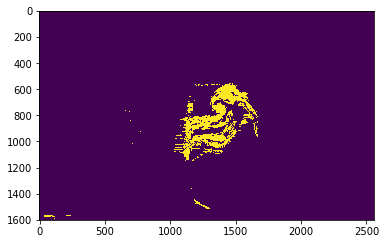

In [205]:
plt.imshow(binary_motions[0])
plt.show()

## Skin Color Detection

In [190]:
# returns the @param img with only skin color (the rest of the pixels are black)
def skinDetect(img):
    B = img[:, :, 0]
    G = img[:, :, 1]
    R = img[:, :, 2]
    skin = np.zeros_like(img)
    maxMat = imgMax(img)
    minMat = imgMin(img)
    cond = (R > 95) & (G > 40) & (B > 20) &((maxMat - minMat) > 15) & (np.abs(R - G) > 15) & (R > G) & (R > B)
    skin[cond] = img[cond]
    return skin

def imgMax(img):
    maxMat = np.max(img.reshape(img.shape[0]*img.shape[1], 3), axis=1).reshape(img.shape[0], img.shape[1])
    return maxMat

def imgMin(img):
    minMat = np.min(img.reshape(img.shape[0]*img.shape[1], 3), axis=1).reshape(img.shape[0], img.shape[1])
    return minMat

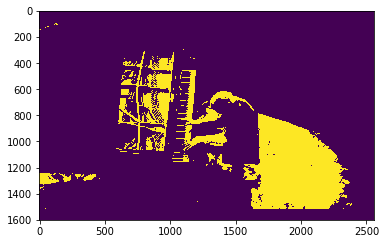

In [191]:
img = data_frames[0]

img_skin = skinDetect(img)
grayscale = cv2.cvtColor(img_skin, cv2.COLOR_BGR2GRAY)
retval, threshOutput = cv2.threshold(grayscale, 1, 1, cv2.THRESH_BINARY)

plt.imshow(threshOutput)
plt.show()